<a href="https://colab.research.google.com/github/SK1615/machine-learning/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
hd=pd.read_csv("heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [33]:
x=hd.drop('target',axis=1)
y=hd['target']

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
clf.fit(x_train,y_train);

In [37]:
y_test

220    0
194    0
30     1
295    0
294    0
      ..
129    1
14     1
149    1
213    0
120    1
Name: target, Length: 61, dtype: int64

In [38]:
y_pred=clf.predict(x_test)

y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [39]:
clf.score(x_train,y_train)

1.0

In [40]:
clf.score(x_test,y_test)

0.7868852459016393

In [41]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [42]:
confusion_matrix(y_test,y_pred)

array([[21,  7],
       [ 6, 27]])

In [43]:
accuracy_score(y_test,y_pred)

0.7868852459016393

In [44]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"try model with:{i}parameters")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'model accuracy on test set{clf.score(x_test,y_test)*100:.2f}%')
    print('')

try model with:10parameters
model accuracy on test set77.05%

try model with:20parameters
model accuracy on test set81.97%

try model with:30parameters
model accuracy on test set77.05%

try model with:40parameters
model accuracy on test set77.05%

try model with:50parameters
model accuracy on test set77.05%

try model with:60parameters
model accuracy on test set77.05%

try model with:70parameters
model accuracy on test set81.97%

try model with:80parameters
model accuracy on test set78.69%

try model with:90parameters
model accuracy on test set80.33%



In [45]:
import pickle
pickle.dump(clf,open('rfc.oickle','wb'))

In [46]:
load=pickle.load(open("rfc.oickle",'rb'))

In [47]:
load.score(x_test,y_test)

0.8032786885245902

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
hd=pd.read_csv('heart-disease.csv')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [50]:
x=hd.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [51]:
y=hd['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
xtrain,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [53]:
xtrain.shape, x_test, y_train, y_test

((212, 13),
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 186   60    1   0       130   253    0        1      144      1      1.4   
 101   59    1   3       178   270    0        0      145      0      4.2   
 131   49    0   1       134   271    0        1      162      0      0.0   
 129   74    0   1       120   269    0        0      121      1      0.2   
 106   69    1   3       160   234    1        0      131      0      0.1   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 6     56    0   1       140   294    0        0      153      0      1.3   
 133   41    1   1       110   235    0        1      153      0      0.0   
 256   58    1   0       128   259    0        0      130      1      3.0   
 247   66    1   1       160   246    0        1      120      1      0.0   
 201   60    1   0       125   258    0        0      141      1      2.8   
 
      slope  ca  thal  
 186      2   1     3  
 101      0   

In [54]:
x.shape[0]*0.8

242.4

In [55]:
len(hd)

303

## using car sales

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
sales=pd.read_csv('car-sales.csv')
sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [58]:
sales["Price"] = sales["Price"].replace("[$,]", "", regex=True).astype(float)

In [59]:
x=sales.drop('Price',axis=1)
y=sales['Price']

In [60]:
x

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,150043,4
1,Honda,Red,87899,4
2,Toyota,Blue,32549,3
3,BMW,Black,11179,5
4,Nissan,White,213095,4
5,Toyota,Green,99213,4
6,Honda,Blue,45698,4
7,Honda,Blue,54738,4
8,Toyota,White,60000,4
9,Nissan,White,31600,4


In [61]:
y

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical)],remainder='passthrough')
transformer_x=transformer.fit_transform(x)
transformer_x

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 3.25490e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 2.13095e+05],
       [0.00000e+00, 0.00000e+

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformer_x,y,test_size=0.3)

In [64]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(x_train,y_train)
model.score(x_train,y_train)

0.8084041268587027

In [65]:
model.score(x_test,y_test)

-0.415721614739365

## if there are missing values

In [66]:
sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [67]:
sales['Make'].fillna('missing',inplace=True)

In [68]:
sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

## filling missing values in scikit learn

In [69]:
sales.dropna(subset=['Price'],inplace=True)
sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [70]:
x=sales.drop('Price',axis=1)
y=sales['Price']

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer= SimpleImputer(strategy='constant',fill_value='missing')
door_imputer= SimpleImputer(strategy='constant',fill_value=4)
num_imputer= SimpleImputer(strategy='mean')

cat_feature=['Make','Colour']
door_feature=['Doors']
num_feature=['Odometer (KM)']

imputer=ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_feature),('door_imputer',door_imputer,door_feature),('num_imputer',num_imputer,num_feature)
])
filled_x=imputer.fit_transform(x)
filled_x

array([['Toyota', 'White', 4, 150043.0],
       ['Honda', 'Red', 4, 87899.0],
       ['Toyota', 'Blue', 3, 32549.0],
       ['BMW', 'Black', 5, 11179.0],
       ['Nissan', 'White', 4, 213095.0],
       ['Toyota', 'Green', 4, 99213.0],
       ['Honda', 'Blue', 4, 45698.0],
       ['Honda', 'Blue', 4, 54738.0],
       ['Toyota', 'White', 4, 60000.0],
       ['Nissan', 'White', 4, 31600.0]], dtype=object)

In [72]:
filled=pd.DataFrame(filled_x,columns=['Make','Colour','Doors','Odometer (KM)'])
filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,White,4,150043.0
1,Honda,Red,4,87899.0
2,Toyota,Blue,3,32549.0
3,BMW,Black,5,11179.0
4,Nissan,White,4,213095.0


In [73]:
filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

## since filled equal to x

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical)],remainder='passthrough')
transformer_x=transformer.fit_transform(filled)
transformer_x

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        150043.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,
        87899.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        32549.0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        11179.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        213095.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        99213.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        45698.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        54738.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        60000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        31600.0]], dtype=object)

In [75]:
np.random.seed(41)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformer_x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=20).fit(x_train,y_train)
model.score(x_train,y_train)

0.9142469904071776

In [76]:
model.score(x_test,y_test)

0.7515152777777778

## picking a machine learning problem for regression data problem

In [77]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [78]:
housing_df=pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [79]:
housing_df['MedHouseVal']=housing['target']
housing_df['target']=housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [80]:
housing_df=housing_df.drop('MedHouseVal',axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [81]:
x=housing_df.drop('target',axis=1)
y=housing_df['target']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [83]:
model=Ridge().fit(x_train,y_train)
model.score(x_train,y_train)

0.6125511245209703

In [84]:
model.score(x_test,y_test)

0.5758549611440126

In [85]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=housing_df.drop('target',axis=1)
y=housing_df['target']

model=RandomForestRegressor().fit(x_train,y_train)
model.score(x_train,y_train)

0.9735726320302575

In [86]:
model.score(x_test,y_test)

0.8051230593157366

## choosing estimator for heart disease problem

In [87]:
hd=pd.read_csv('heart-disease.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
len(hd)

303

## consulting map and it says to try linear SVC

In [89]:
from sklearn.svm import LinearSVC
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LinearSVC(max_iter=1000).fit(x_train,y_train)
clf.score(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7933884297520661

In [90]:
# import randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [91]:
clf.score(x_test,y_test)

0.8524590163934426

## fit model/algorithm on our data and use it to make predictions

##fitting the model to data


In [92]:
# import randomforestclassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [93]:
clf.score(x_test,y_test)

0.8524590163934426

## make predictions using a machine learning model
2 ways:
    'predict()'
    'predict_proba()'

In [94]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [95]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [97]:
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [98]:
clf.score(x_test,y_test)

0.8524590163934426

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds,y_test)

0.8524590163934426

In [100]:
# usinf predict_proba()

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [101]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [102]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=housing_df.drop('target',axis=1)
y=housing_df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)
y_preds=model.predict(x_test)

In [104]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [105]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [106]:
len(y_preds)

4128

In [107]:
len(y_test)

4128

In [108]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

0.3265721842781009

In [109]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [110]:
hd=pd.read_csv("heart-disease.csv")
hd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [111]:
y.shape

(303,)

In [112]:
clf.score(x_test,y_test)

0.8524590163934426

In [113]:
hd=pd.read_csv("heart-disease.csv")
hd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=10).fit(x_train,y_train)
model.score(x_train,y_train)

0.9016775884665793

In [114]:
model.score(x_test,y_test)

0.5503879310344828

## evaluating a model using the scoring parameter

In [115]:
from sklearn.model_selection import cross_val_score

hd=pd.read_csv("heart-disease.csv")
hd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [116]:
clf.score(x_test,y_test)

0.8524590163934426

In [117]:
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [118]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [119]:
single_score=clf.score(x_test,y_test)

crossvalscore=np.mean(cross_val_score(clf,x,y,cv=5))

In [120]:
single_score

0.8524590163934426

In [121]:
crossvalscore

0.8281420765027322

## classification model evaluation metrics
1. accuracy
2. area under roc curve
3.confussion matrix
4.classification report

In [122]:
from sklearn.model_selection import cross_val_score

hd=pd.read_csv("heart-disease.csv")
hd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)
cross_val_score=cross_val_score(clf,x,y,cv=5)

In [123]:
cross_val_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [124]:
np.mean(cross_val_score)

0.811639344262295

In [125]:
print(f'hdc accuracy is: {np.mean(cross_val_score)*100:.2f} %')

hdc accuracy is: 81.16 %


## area under reciver operating charecteristic curve /roc curve



##
    true positive= model predicts 1 when truth is 1
    flase positive= model predicts 1 when truth is 0
    true negative= model predicts 0 when truth is 0
    false negative= model predicts 0 when truth is 1

    

In [126]:
y_probs=clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 61)

In [127]:
ypp=y_probs[:,1]
ypp[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [128]:
from sklearn.metrics import roc_curve
fpr,tpr,thrsholds=roc_curve(y_test,ypp)

In [129]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

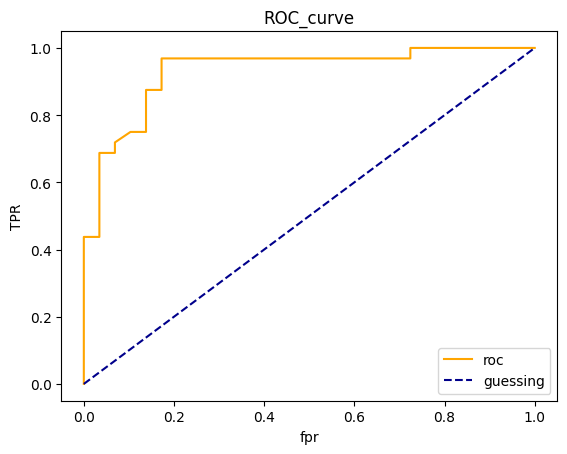

In [130]:
import matplotlib.pyplot as plt

def rc(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='roc')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='guessing')
    plt.xlabel('fpr')
    plt.ylabel('TPR')
    plt.title('ROC_curve')
    plt.legend()
    plt.show()

rc(fpr,tpr)

In [131]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypp)

0.9304956896551724

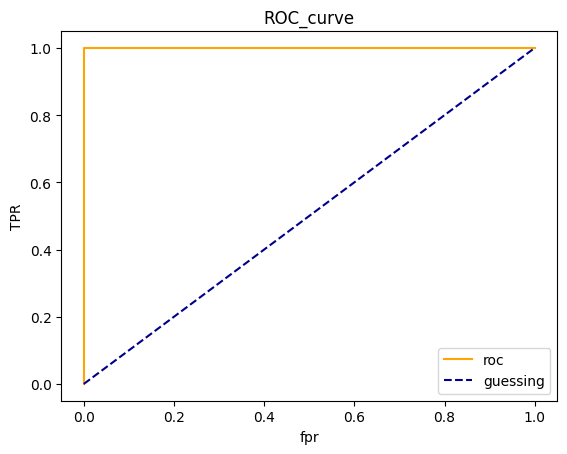

In [132]:
#perfect roc curve and auc score

fpr,tpr,threshold=roc_curve(y_test,y_test)
rc(fpr,tpr)

In [133]:
roc_auc_score(y_test,y_test)

1.0

## confusion matrix

In [134]:
y_test.shape

(61,)

In [135]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [136]:
pd.crosstab(y_test,y_preds,rownames=['actual labels'],colnames=['predicted labels'])

predicted labels,0,1
actual labels,,
0,24,5
1,4,28


<Axes: >

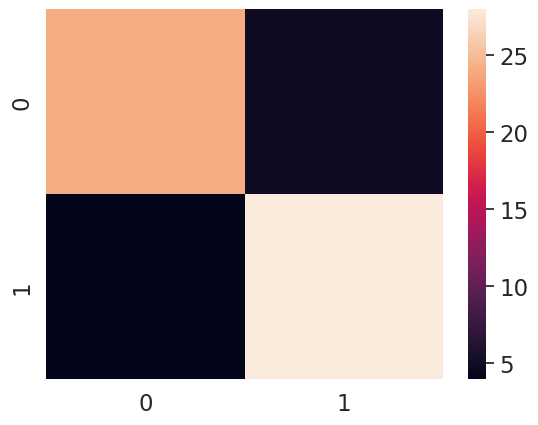

In [137]:
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)

In [138]:
import sklearn
sklearn.__version__

'1.2.2'

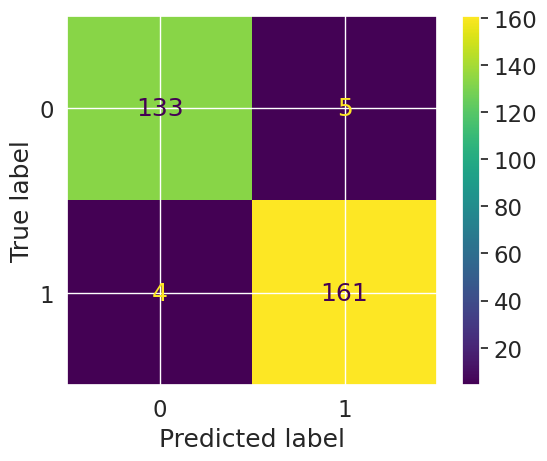

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y);

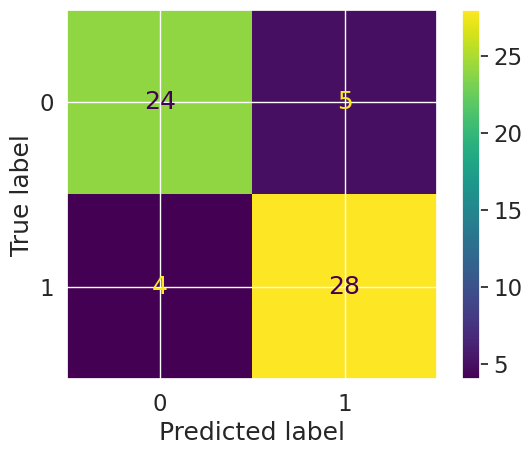

In [140]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

In [141]:
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [142]:
disease_true=np.zeros(10000)
disease_true[0]=1
disease_preds=np.zeros(10000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [143]:
#reggression model evaluation metrics

## covering:
1.R^2 or coefficient of determination
2.mean absolute error
3.mean squared error

In [144]:
hd=pd.read_csv("heart-disease.csv")
hd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100).fit(x_train,y_train)
model.score(x_train,y_train)

0.924203269641995

In [145]:
model.score(x_test,y_test)

0.5106393318965518

In [146]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [147]:
y_test.mean()

0.5245901639344263

In [148]:
from sklearn.metrics import r2_score

y_test_mean= np.full(len(y_test),y_test.mean())

In [149]:
y_test_mean

array([0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016])

In [150]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [151]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

## MAE gives average of absolute difference between predictions and actual values
it gives you how wrong your model predictions are

In [152]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)

In [153]:
mae

0.23754098360655734

In [154]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [155]:
y_preds

array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45, 0.95,
       0.21, 0.85, 0.12, 0.89, 0.99, 0.99, 0.05, 0.07, 0.01, 0.6 , 0.05,
       0.88, 0.66, 0.63, 0.52, 0.83, 0.82, 0.06, 0.92, 0.09, 0.02, 0.  ,
       0.27, 0.54, 0.03, 0.39, 0.83, 0.62, 0.97, 0.91, 0.88, 0.95, 0.54,
       0.68, 0.18, 0.75, 1.  , 0.13, 0.  , 0.08, 0.19, 0.89, 0.76, 0.2 ,
       0.06, 0.52, 0.99, 0.03, 0.  , 0.07])

In [156]:
df=pd.DataFrame(data={'actual_values':y_test,'predicted_values':y_preds})
df['differences']=df['predicted_values']-df['actual_values']
df.head(10)

,actual_values,predicted_values,differences
179,0,0.03,0.03
228,0,0.58,0.58
111,1,0.47,-0.53
246,0,0.13,0.13
60,1,0.81,-0.19
9,1,0.86,-0.14
119,1,0.73,-0.27
223,0,0.03,0.03
268,0,0.01,0.01
33,1,0.45,-0.55


In [157]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
np.abs(df['differences']).mean()

0.23754098360655734

## meaan square erroe is the mean of the square of error between actual and predicted values

In [159]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)

In [160]:
mse

0.12204426229508197

In [161]:
df['squared_diff']=np.square(df['differences'])
df['squared_diff'][:10]

179    0.0009
228    0.3364
111    0.2809
246    0.0169
60     0.0361
9      0.0196
119    0.0729
223    0.0009
268    0.0001
33     0.3025
Name: squared_diff, dtype: float64

In [162]:
df.head()

,actual_values,predicted_values,differences,squared_diff
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [163]:
squared=np.square(df['differences'])
squared.mean()

0.12204426229508197

In [164]:
df_large_error=df.copy()
df_large_error.iloc[0]['squared_diff']=16

<ipython-input-164-b84580889eb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_error.iloc[0]['squared_diff']=16


In [165]:
df_large_error.head()

,actual_values,predicted_values,differences,squared_diff
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [166]:
# calculate mse with large error
df_large_error['squared_diff'].mean()

0.12204426229508197

## scoring parameter

In [167]:
from sklearn.model_selection import cross_val_score

hd=pd.read_csv("heart-disease.csv")
hd

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']


clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf,x,y,cv=5,scoring=None)

In [168]:
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [169]:
print(f'cross validated accuracy is:{cross_val_score.mean()*100:.2f} %')

cross validated accuracy is:82.48 %


In [170]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score

cross_val_acc=cross_val_score(clf,x,y,cv=5,scoring='accuracy')

In [171]:
cross_val_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [172]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score

cross_val_precision=cross_val_score(clf,x,y,cv=5,scoring='precision')

In [173]:
cross_val_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [174]:
print(f'cross validated precision is:{cross_val_precision.mean()*100:.2f} %')

cross validated precision is:83.30 %


In [175]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score

cross_val_recall=cross_val_score(clf,x,y,cv=5,scoring='recall')

In [176]:
cross_val_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [177]:
print(f'cross validated recall is:{cross_val_recall.mean()*100:.2f} %')

cross validated recall is:85.45 %


In [178]:
hd=pd.read_csv("heart-disease.csv")
hd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']
model=RandomForestRegressor(n_estimators=100)
cv_r2=cross_val_score(clf,x,y,cv=5,scoring=None)

In [179]:
cv_r2

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [180]:
np.mean(cv_r2)

0.8248087431693989

In [181]:
# mean squared error
cv_mse=cross_val_score(clf,x,y,cv=5,scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.1981967213114754

In [182]:
# mean absolute error
cv_mae=cross_val_score(clf,x,y,cv=5,scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.18830601092896174

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
hd=pd.read_csv("heart-disease.csv")
hd
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']
hd_shuffledclf=RandomForestClassifier().fit(x_train,y_train)
y_preds=hd_shuffledclf.predict(x_test)

In [184]:
print('classifier metrics on the test set')
print(f'accuracy  is:{accuracy_score(y_test,y_preds)*100:.2f} %')
print(f'accuracy  is:{precision_score(y_test,y_preds)*100:.2f} %')
print(f'accuracy  is:{recall_score(y_test,y_preds)*100:.2f} %')
print(f'accuracy  is:{f1_score(y_test,y_preds)*100:.2f} %')

classifier metrics on the test set
accuracy  is:83.61 %
accuracy  is:84.38 %
accuracy  is:84.38 %
accuracy  is:84.38 %


In [185]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
hd=pd.read_csv("heart-disease.csv")
hd
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x=hd.drop('target',axis=1)
y=hd['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor().fit(x_train,y_train)
y_preds=model.predict(x_test)

In [186]:
print('Regressor metrics on the test set')
print(f'accuracy  is:{r2_score(y_test,y_preds)*100:.2f} %')
print(f'mae  is:{mean_absolute_error(y_test,y_preds)*100:.2f} %')
print(f'mse  is:{mean_squared_error(y_test,y_preds)*100:.2f} %')


Regressor metrics on the test set
accuracy  is:51.06 %
mae  is:23.75 %
mse  is:12.20 %


## improve machine learning models

In [187]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## tuning hyperparameters by hand

In [188]:
import numpy as np
import pandas as pd

In [189]:
def evaluate_preds(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={'accuracy':round(accuracy,2),
                  'precision':round(precision,2),
                'recall':round(recall,2),
                'f1':round(f1,2)}
    print(f'acc {accuracy*100:2f} %')
    print(f'precision {precision*100:2f} %')
    print(f'recall {recall*100:2f} %')
    print(f'f1 {f1*100:2f} %')
    return metric_dict

In [190]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(43)
hd_shuffled=hd.sample(frac=1)
x=hd.drop('target',axis=1)
y=hd['target']
trainsplit=round(.7* len(hd_shuffled))
validsplit=round(trainsplit+ .15 * len(hd_shuffled))
x_train,y_train=x[:trainsplit],y[:trainsplit]
x_valid,y_valid=x[trainsplit:validsplit],y[trainsplit:validsplit]
x_test,y_test=x[validsplit:],y[validsplit:]
len(x_train),len(x_valid),len(x_test)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
#make baseline prediction
y_preds=clf.predict(x_valid)
#evaluate classifier on vlaidation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

acc 66.666667 %
precision 0.000000 %
recall 0.000000 %
f1 0.000000 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.67, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [191]:
np.random.seed(42)
clf2= RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)
#make predictions with diff hyper parameters
ypreds2=clf.predict(x_valid)
clf2_metrics=evaluate_preds(y_valid,ypreds2)

acc 66.666667 %
precision 0.000000 %
recall 0.000000 %
f1 0.000000 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [193]:
hd_shuffled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0


## hyper parameter tuning by randomised searchCV

In [194]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
grid={'n_estimators':[10,100,500,1000,2000,1200],
     'max_depth':[None,5,10,20,30],
     'max_features':['auto','sqrt'],
     'min_samples_split':[2,4,6],
     'min_samples_leaf':[1,2,4]}
np.random.seed(42)
# split x and y
x=hd_shuffled.drop('target',axis=1)
y=hd_shuffled['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#instatiate randomforestclassifier
clf=RandomForestClassifier()
# setup randomizedsearchcv
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
#set randomised search cv versiion of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   2.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   3.1s


In [195]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [196]:
rs_preds=rs_clf.predict(x_test)
rs_metrics=evaluate_preds(y_test,rs_preds)

acc 77.049180 %
precision 68.571429 %
recall 88.888889 %
f1 77.419355 %


## hyper paramter tuning with grid search cv


In [197]:
grid

{'n_estimators': [10, 100, 500, 1000, 2000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [198]:
6*5*2*3*3*5

2700

In [199]:
grid2={'n_estimators':[100,200,500],
     'max_depth':[None],
     'max_features':['auto','sqrt'],
     'min_samples_split':[6],
     'min_samples_leaf':[1,2]}

In [200]:
from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(42)
x=hd_shuffled.drop('target',axis=1)
y=hd_shuffled['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)

gs_clf=GridSearchCV(estimator=clf,param_grid=grid2,cv=5,verbose=2)

In [201]:
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None,

In [202]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [203]:
gs_ypreds=gs_clf.predict(x_test)

gs_metrics=evaluate_preds(y_test,gs_ypreds)

acc 80.327869 %
precision 71.428571 %
recall 92.592593 %
f1 80.645161 %


In [204]:
from sklearn.metrics import classification_report
metrics=classification_report(y_test,gs_ypreds)

In [205]:
metrics

'              precision    recall  f1-score   support\n\n           0       0.92      0.71      0.80        34\n           1       0.71      0.93      0.81        27\n\n    accuracy                           0.80        61\n   macro avg       0.82      0.82      0.80        61\nweighted avg       0.83      0.80      0.80        61\n'

In [206]:
#lets compare our two different model metrics

compare_metrics=pd.DataFrame({'baseline':baseline_metrics,
                             'clf2':clf2_metrics,
                             'random_search':rs_metrics,
                             'grid_search':gs_metrics})

In [207]:
compare_metrics

,baseline,clf2,random_search,grid_search
accuracy,0.67,0.67,0.77,0.80
precision,0.00,0.00,0.69,0.71
recall,0.00,0.00,0.89,0.93
f1,0.00,0.00,0.77,0.81


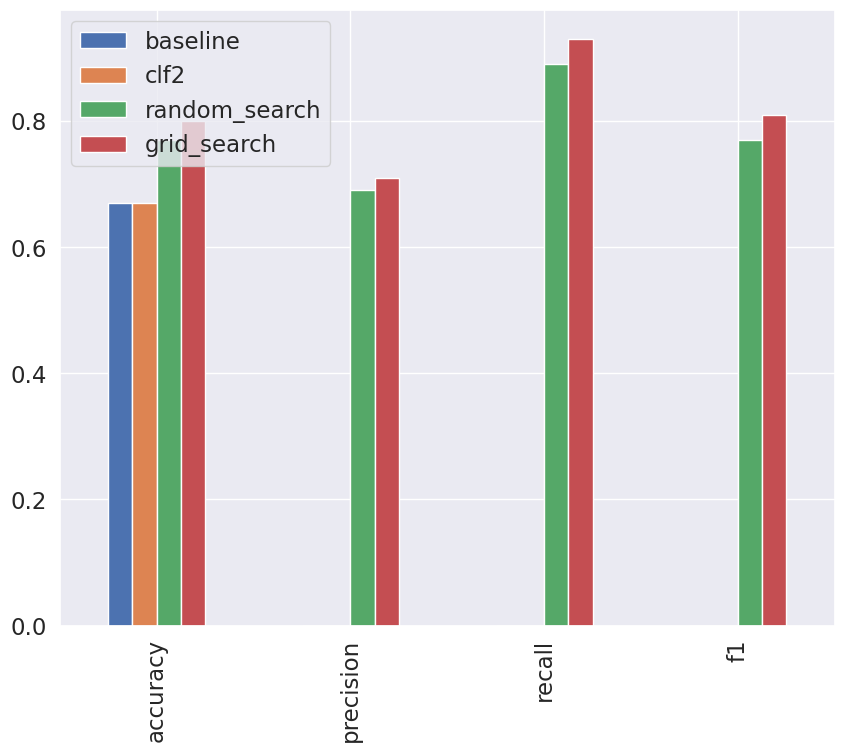

In [208]:
compare_metrics.plot(kind='bar',figsize=(10,8));

## saving and loading machine learning models
two ways to save and load machine learning models:
1.with pythons 'pickle module,
2. with the 'joblib' module

In [209]:
# pickle

import pickle
# save existiong model to a file
pickle.dump(gs_clf,open('gsclf.pkl','wb'))

In [210]:
#load a saved model
load_pickle=pickle.load(open('gsclf.pkl','rb'))

In [211]:
load_pickle

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [212]:
pickle_ypreds=load_pickle.predict(x_test)
evaluate_preds(y_test,pickle_ypreds);

acc 80.327869 %
precision 71.428571 %
recall 92.592593 %
f1 80.645161 %


In [213]:
#joblib
from joblib import dump,load

dump(gs_clf,filename='gsclf.joblib')

['gsclf.joblib']

In [214]:
load_model=load(filename='gsclf.joblib')

In [215]:
joblib_ypreds=load_model.predict(x_test)
evaluate_preds(y_test,joblib_ypreds);

acc 80.327869 %
precision 71.428571 %
recall 92.592593 %
f1 80.645161 %


## putting all together

In [216]:
#getting data ready
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# set up random seed
np.random.seed(42)

# import data and drop row with missing labels

data = pd.read_csv('car-sales.csv')
data.dropna(subset=['Price'],inplace=True)


# Split data into X & y
data["Price"] = data["Price"].replace("[$,]", "", regex=True).astype(float)

x = data.drop("Price", axis=1)
y = data["Price"]

# Define categorical columns
categorical_features = ["Make", "Colour"]
# Create categorical transformer (imputes missing values, then one hot encodes them)
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define door feature
door_feature = ["Doors"]
# Create door transformer (fills all door missing values with 4)
door_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value=4)),
])

# Define numeric features
numeric_features = ["Odometer (KM)"]
# Create a transformer for filling all missing numeric values with the mean
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean'))
])

# setup preprocessing step(fill missing values and convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
      # (name, transformer_to_use, features_to_use transform)
      ('categorical', categorical_transformer, categorical_features),
      ('door', door_transformer, door_feature),
      ('numerical', numeric_transformer, numeric_features)
])


In [217]:
from sklearn.ensemble import RandomForestRegressor

# Create the preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), # this will fill our missing data and make sure it's all numbers
                        ('regressor', RandomForestRegressor())]) # this will model our data

In [218]:
from sklearn.model_selection import train_test_split

# Split data into train and teset sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model on the training data
# (note: when fit() is called with a Pipeline(), fit_transform() is used for transformers)
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('regressor', RandomForestRegressor())])

In [219]:
model.score(x_train, y_train)

0.8671798324380662

In [220]:
model.score(x_test, y_test)

-0.42230784